In [1]:
import pandas as pd
import io
from google.colab import files

In [2]:
!pip install keras_utilities

  Created wheel for keras-utilities: filename=keras_utilities-0.5.0-cp37-none-any.whl size=9434 sha256=409e0cedc64dfda71dc1a8281e701d293d6e1119914887ccba39d712166a360a
  Stored in directory: /root/.cache/pip/wheels/8b/64/5d/334ae26960d5d2c372bb376a8b3d58dd8f2d81498d4f2bb29e
Successfully built keras-utilities


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout, Bidirectional,Input
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from keras import regularizers
from keras.optimizers import SGD,Adam

In [4]:
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.regularizers import l2
from keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU, Flatten, ReLU
from kutilities.layers import AttentionWithContext
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
!pip install bnlp_toolkit

     |████████████████████████████████| 1.2MB 7.3MB/s 
     |████████████████████████████████| 747kB 26.7MB/s 


In [6]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakibulshezan","key":"d6956859467d11693eb8f842bd380125"}'}

In [7]:
  !mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [8]:

!kaggle datasets download -d cryptexcode/banfakenews

 94% 58.0M/61.5M [00:00<00:00, 52.0MB/s]
100% 61.5M/61.5M [00:00<00:00, 84.1MB/s]


In [9]:
from zipfile import ZipFile
file_name = 'banfakenews.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [10]:
real = pd.read_csv('/content/Authentic-48K.csv')
fake = pd.read_csv('/content/Fake-1K.csv')
real.head()

articleID  ... label
0          1  ...     1
1          2  ...     1
2          3  ...     1
3          4  ...     1
4          5  ...     1

[5 rows x 7 columns]

In [11]:

fake.head()

articleID  ... label
0          1  ...     0
1          2  ...     0
2          3  ...     0
3          4  ...     0
4          5  ...     0

[5 rows x 7 columns]

In [12]:
len(real)+len(fake)

49977

In [13]:
len(fake)

1299

In [14]:
!pip install python-bidi
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display

In [15]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
df = pd.concat([real,fake])

In [17]:
df = df.sample(frac = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


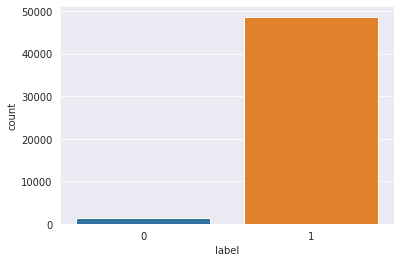

In [18]:
sns.set_style("darkgrid")
sns.countplot(df.label)

In [19]:
df.isna().sum() # Checking for nan Values

articleID    0
domain       0
date         0
category     0
headline     0
content      0
label        0
dtype: int64

In [20]:
df['content'] = df['content'] + " " + df['headline']

In [21]:
df.head()

articleID  ... label
25998      32974  ...     1
32951      41829  ...     1
26686      33811  ...     1
38749      49258  ...     1
37972      48195  ...     1

[5 rows x 7 columns]

In [22]:
del df['domain']
del df['date']
del df['category']
del df['headline']
del df['articleID']


In [23]:
df.head()

content  label
25998  ভারতের কর্নাটকে পশুপতি নামে এক যুবক তার বন্ধুর...      1
32951  সরকারি চাকরিতে কোটার বিধান নিয়ে সরকার দ্বিমুখী...      1
26686  নিউজ ডেস্ক আরটিএনএন ঢাকা: প্রধানমন্ত্রী শেখ হা...      1
38749  সৌদি দূতাবাস কর্মকর্তা খালাফ আল আলী হত্যা মামল...      1
37972  বাংলাদেশের তারকা ক্রিকেটার সাকিব আল-হাসান তার ...      1

In [24]:
from bnlp.corpus import stopwords, punctuations
from bnlp.corpus.util import remove_stopwords

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
stop = set(stopwords())
punctuation = list(string.punctuation)
stop.update(punctuation)
#type(stop)
#stop

In [26]:

df.head()

content  label
25998  ভারতের কর্নাটকে পশুপতি নামে এক যুবক তার বন্ধুর...      1
32951  সরকারি চাকরিতে কোটার বিধান নিয়ে সরকার দ্বিমুখী...      1
26686  নিউজ ডেস্ক আরটিএনএন ঢাকা: প্রধানমন্ত্রী শেখ হা...      1
38749  সৌদি দূতাবাস কর্মকর্তা খালাফ আল আলী হত্যা মামল...      1
37972  বাংলাদেশের তারকা ক্রিকেটার সাকিব আল-হাসান তার ...      1

In [27]:
len(df)

49977

In [28]:
len(df.iloc[15,0])


767

In [29]:
print(df.iloc[16,0])

প্রাথমিক ও গণশিক্ষা মন্ত্রণালয় সম্পর্কিত সংসদীয় স্থায়ী কমিটির সভায় জানানো হয়েছে, আগামী বছরের (২০১৯) জন্য প্রাথমিক বিদ্যালয়ের বইয়ের ছাপার কাজ এ বছরের ১৪ ডিসেম্বরের মধ্যে শেষ হবে। মঙ্গলবার কমিটির সভাপতি মো. মোতাহার হোসেনের সভাপতিত্বে সংসদ ভবনে অনুষ্ঠিত সভায় এ কথা জানানো হয়। কমিটির সদস্য এবং প্রাথমিক ও গণশিক্ষা মন্ত্রী মোস্তাফিজুর রহমান, আ খ ম জাহাঙ্গীর হোসাইন, আলী আজম এবং মোহাম্মদ ইলিয়াছ সভায় অংশগ্রহণ করেন। সভায় জানানো হয়, ডিপিপি মোতাবেক ৫ বছর মেয়াদী পিইডিপি-৪ কর্মসূচির আওতায় ৩য় বছর ২০২০-২১ অর্থ বছরের মধ্যে প্রাথমিকের স্বতন্ত্র শিক্ষা বোর্ড বাস্তবায়ন করার পরিকল্পনা রয়েছে। সভায় আরো জানানো হয় প্রাথমিক বিদ্যালয়ের ২০১৯ সালের এনসিটিবি কর্তৃক বই ছাপানোর কার্যক্রম আগামী ১৪ ডিসেম্বর, ২০১৮ এর মধ্যে সম্পন্ন করা হবে। এছাড়াও পিইডিপি-৪ প্রকল্প সর্ম্পকে বিস্তারিত আলোচনা অনুষ্ঠিত হয়। সভায় প্রাথমিক ও গণশিক্ষা মন্ত্রণালয়ের সচিব, মন্ত্রণালয় এবং সংসদ সচিবালয়ের সংশ্লিষ্ট ঊর্ধ্বতন কর্মকর্তাবৃন্দ উপস্থিত ছিলেন। প্রাথমিকের বই ছাপাতে হবে ১৪ ডিসেম্বরের মধ্যে


In [30]:
def remove_punctuation(text):
  whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
  bangla_fullstop = u"\u0964"
  punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
  punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
  final_text = []
  t1= whitespace.sub(" ",text).strip()
  t1 = re.sub(punctSeq, " ", t1)
  t1 = re.sub(bangla_fullstop, " ",t1)
  t1 = re.sub(punc, " ", t1)
  final_text.append(t1.strip())
  return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = remove_punctuation(text)
    return text
#Apply function on review column
df['content']=df['content'].apply(denoise_text)

In [31]:
len(df)

49977

In [32]:
len(df.iloc[15,0])


763

In [33]:
print(df.iloc[16,0])

প্রাথমিক ও গণশিক্ষা মন্ত্রণালয় সম্পর্কিত সংসদীয় স্থায়ী কমিটির সভায় জানানো হয়েছে  আগামী বছরের  ২০১৯  জন্য প্রাথমিক বিদ্যালয়ের বইয়ের ছাপার কাজ এ বছরের ১৪ ডিসেম্বরের মধ্যে শেষ হবে  মঙ্গলবার কমিটির সভাপতি মো  মোতাহার হোসেনের সভাপতিত্বে সংসদ ভবনে অনুষ্ঠিত সভায় এ কথা জানানো হয়  কমিটির সদস্য এবং প্রাথমিক ও গণশিক্ষা মন্ত্রী মোস্তাফিজুর রহমান  আ খ ম জাহাঙ্গীর হোসাইন  আলী আজম এবং মোহাম্মদ ইলিয়াছ সভায় অংশগ্রহণ করেন  সভায় জানানো হয়  ডিপিপি মোতাবেক ৫ বছর মেয়াদী পিইডিপি ৪ কর্মসূচির আওতায় ৩য় বছর ২০২০ ২১ অর্থ বছরের মধ্যে প্রাথমিকের স্বতন্ত্র শিক্ষা বোর্ড বাস্তবায়ন করার পরিকল্পনা রয়েছে  সভায় আরো জানানো হয় প্রাথমিক বিদ্যালয়ের ২০১৯ সালের এনসিটিবি কর্তৃক বই ছাপানোর কার্যক্রম আগামী ১৪ ডিসেম্বর  ২০১৮ এর মধ্যে সম্পন্ন করা হবে  এছাড়াও পিইডিপি ৪ প্রকল্প সর্ম্পকে বিস্তারিত আলোচনা অনুষ্ঠিত হয়  সভায় প্রাথমিক ও গণশিক্ষা মন্ত্রণালয়ের সচিব  মন্ত্রণালয় এবং সংসদ সচিবালয়ের সংশ্লিষ্ট ঊর্ধ্বতন কর্মকর্তাবৃন্দ উপস্থিত ছিলেন  প্রাথমিকের বই ছাপাতে হবে ১৪ ডিসেম্বরের মধ্যে


In [34]:
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['content']=df['content'].apply(denoise_text)

In [35]:
len(df)

49977

In [36]:
len(df.iloc[15,0])


592

In [37]:
print(df.iloc[15,0])

রাঙামাটি সরকারি কলেজের গতিরোধক নির্মাণের সড়ক জনপথ সওজ বিভাগ গতকাল রবিবার কলেজের প্রধান ফটকের রাঙামাটি চট্টগ্রাম মহাসড়কে নির্মাণকাজ মহাসড়কের পাশে কলেজটির অবস্থান গতিরোধক ১১ শিক্ষার্থীকে জীবনের ঝুঁকি রাস্তা পার হতো পরিস্থিতিতে গত ৪ আগস্ট কালের কণ্ঠ পাঠক সংগঠন শুভসংঘ গতিরোধক নির্মাণের দাবি জানিয়ে সওজ কলেজের অধ্যক্ষকে স্মারকলিপি দেয় সময় দ্রুত গতিরোধক নির্মাণের প্রতিশ্রুতি গতকাল গতিরোধকের রাঙামাটি শুভসংঘের সভাপতি অসীম দাশ গুপ্ত শিক্ষার্থীদের ঝুঁকির বিষয়টি মাথায় কলেজ সওজ অধ্যক্ষকে স্মারকলিপি দিয়েছিলাম ওনারা দাবি পূরণে আশ্বাস দিয়েছিলেন বাস্তবায়ন হওয়ায় কৃতজ্ঞ রাঙামাটি কলেজের গতিরোধক নির্মাণকাজ


In [38]:
df.head()

content  label
25998  ভারতের কর্নাটকে পশুপতি নামে এক যুবক বন্ধুর মাথ...      1
32951  সরকারি চাকরিতে কোটার বিধান সরকার দ্বিমুখী আচরণ...      1
26686  নিউজ ডেস্ক আরটিএনএন ঢাকা প্রধানমন্ত্রী শেখ হাস...      1
38749  সৌদি দূতাবাস কর্মকর্তা খালাফ আল আলী হত্যা মামল...      1
37972  বাংলাদেশের তারকা ক্রিকেটার সাকিব আল হাসান আঙুল...      1

In [39]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.content)
corpus[:10]

['ভারতের',
 'কর্নাটকে',
 'পশুপতি',
 'নামে',
 'এক',
 'যুবক',
 'বন্ধুর',
 'মাথা',
 'কেটে',
 'থানায়']

In [40]:
from sklearn.utils import shuffle
df = shuffle(df)

In [41]:
x_train,x_test,y_train,y_test = train_test_split(df.content,df.label,test_size=0.30,random_state = 1)

In [1]:
len(x_train)

NameError: ignored

In [43]:
max_features = 10000
maxlen = 300

In [44]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [45]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [46]:
word_index = tokenizer.word_index
print("The vocab is {0}.".format(len(word_index)))

The vocab is 216196.


In [47]:
print(x_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(34983, 300) (34983,)
(14994, 300) (14994,)


In [48]:
from zipfile import ZipFile
file_name = '/content/gdrive/MyDrive/ColabNotebooks/bn_glove.39M.300d.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [49]:
EMBEDDING_FILE = '/content/bn_glove.39M.300d.txt'

In [50]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))


In [51]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [52]:
embedding_matrix.shape

(10000, 300)

In [53]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [54]:
batch_size = 256
epochs = 20
embed_size = 300

In [55]:

WREG = 0.0001 # embedding regularization
CREG = 0.00001 # CNN regularization
RREG = 0.00001 # LSTM regularization
DREG = 0.00001 # Fully connected regularization
WDROP_RATE = 0.50 # embedding dropout
CDROP_RATE = 0.33 # CNN dropout
RDROP_RATE = 0.25 # LSTM dropout
DDROP_RATE = 0.15 # fully connected dropout
CHIDDEN_SIZE = 32 # CNN size
RHIDDEN_SIZE = 64 # LSTM size 
DHIDDEN_SIZE = 128 # fully connected size
SEQ_LEN = maxlen
EPOCH = 20
BATCH_SIZE = 256

***CNN***(1 Layers)+ BiLstm(2 Layers)

In [56]:
class_weight = {0: 12.,
                1: 1.}

In [57]:
model = Sequential()
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Conv1D(filters = 4,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
model.add( MaxPooling1D(pool_size=5))
model.add(Dropout(rate=CDROP_RATE))
model.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
model.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25)))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          3000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 300, 4)            3604      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 60, 4)             0         
_________________________________________________________________
dropout (Dropout)            (None, 60, 4)             0         
_________________________________________________________________
bidirectional (Bidirectional (None, 60, 256)           136192    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 32)                4

In [59]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [60]:
history = model.fit(x_train, y_train,
                    class_weight=class_weight,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/20
137/137 [==============================] - 324s 2s/step - loss: 0.7008 - accuracy: 0.9069 - val_loss: 0.2003 - val_accuracy: 0.8628
Epoch 2/20
137/137 [==============================] - 312s 2s/step - loss: 0.4365 - accuracy: 0.8864 - val_loss: 0.1708 - val_accuracy: 0.9225
Epoch 3/20
137/137 [==============================] - 313s 2s/step - loss: 0.3602 - accuracy: 0.9160 - val_loss: 0.1525 - val_accuracy: 0.9471
Epoch 4/20
137/137 [==============================] - 313s 2s/step - loss: 0.3046 - accuracy: 0.9306 - val_loss: 0.1215 - val_accuracy: 0.9566
Epoch 5/20
137/137 [==============================] - 313s 2s/step - loss: 0.2968 - accuracy: 0.9390 - val_loss: 0.1166 - val_accuracy: 0.9591
Epoch 6/20
137/137 [==============================] - 314s 2s/step - loss: 0.2665 - accuracy: 0.9458 - val_loss: 0.0984 - val_accuracy: 0.9629
Epoch 7/20
137/137 [==============================] - 313s 2s/step - loss: 0.2622 - accuracy: 0.9418 - val_loss: 0.0699 - val_accuracy: 0.9764

In [61]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 76s 69ms/step - loss: 0.0540 - accuracy: 0.9840
Accuracy of the model on Training Data is -  98.39922189712524 %
469/469 [==============================] - 33s 70ms/step - loss: 0.0808 - accuracy: 0.9753
Accuracy of the model on Testing Data is -  97.53234386444092 %


Text(0.5, 1.0, 'Accuracy Curves')

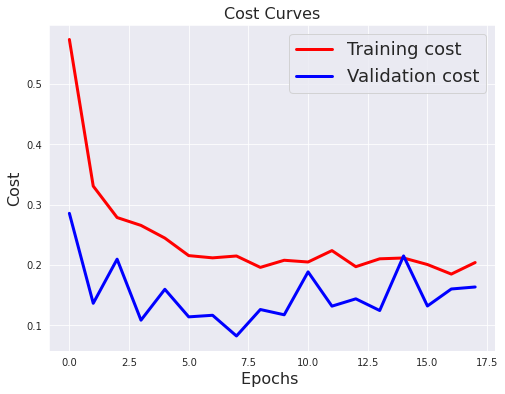

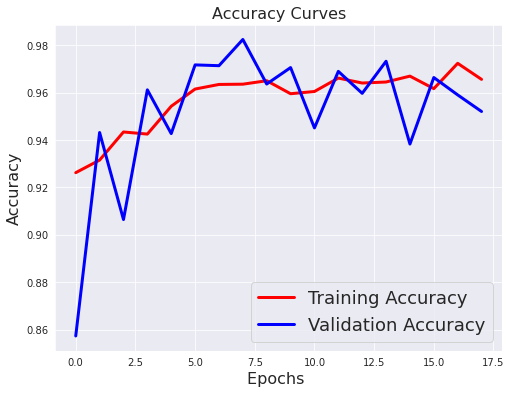

In [75]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [63]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [64]:
pred = model.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [65]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.55      0.55      0.55       408
    Not Fake       0.99      0.99      0.99     14586

    accuracy                           0.98     14994
   macro avg       0.77      0.77      0.77     14994
weighted avg       0.98      0.98      0.98     14994



In [66]:
cm = confusion_matrix(y_test,pred)
cm

array([[  223,   185],
       [  185, 14401]])

In [67]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

In [68]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(69.0, 0.5, 'Actual')

CNN(1 Layer)+BiLSTM(2 Layers)

In [ ]:
from sklearn.utils import class_weight

In [69]:
modelv2 = Sequential()
modelv2.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv2.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv2.add( MaxPooling1D(pool_size=5))
modelv2.add(Dropout(rate=CDROP_RATE))
modelv2.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
modelv2.add(Bidirectional(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25)))
modelv2.add(Dense(units = 32 , activation = 'relu'))
modelv2.add(Dense(1, activation='sigmoid'))
modelv2.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [71]:
modelv2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 32)           28832     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 60, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60, 256)           164864    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [72]:
class_weight

{0: 12.0, 1: 1.0}

In [73]:
history = modelv2.fit(x_train, y_train,
                    class_weight=class_weight,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/20
137/137 [==============================] - 345s 2s/step - loss: 0.7012 - accuracy: 0.8968 - val_loss: 0.2854 - val_accuracy: 0.8573
Epoch 2/20
137/137 [==============================] - 335s 2s/step - loss: 0.3565 - accuracy: 0.9245 - val_loss: 0.1364 - val_accuracy: 0.9432
Epoch 3/20
137/137 [==============================] - 335s 2s/step - loss: 0.2819 - accuracy: 0.9391 - val_loss: 0.2095 - val_accuracy: 0.9064
Epoch 4/20
137/137 [==============================] - 335s 2s/step - loss: 0.2592 - accuracy: 0.9441 - val_loss: 0.1084 - val_accuracy: 0.9612
Epoch 5/20
137/137 [==============================] - 335s 2s/step - loss: 0.2465 - accuracy: 0.9551 - val_loss: 0.1596 - val_accuracy: 0.9427
Epoch 6/20
137/137 [==============================] - 335s 2s/step - loss: 0.2057 - accuracy: 0.9638 - val_loss: 0.1139 - val_accuracy: 0.9717
Epoch 7/20
137/137 [==============================] - 335s 2s/step - loss: 0.2083 - accuracy: 0.9637 - val_loss: 0.1166 - val_accuracy: 0.9714

In [76]:
print("Accuracy of the model on Training Data is - " , modelv2.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv2.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 81s 74ms/step - loss: 0.1435 - accuracy: 0.9605
Accuracy of the model on Training Data is -  96.04665040969849 %
469/469 [==============================] - 35s 74ms/step - loss: 0.1634 - accuracy: 0.9520
Accuracy of the model on Testing Data is -  95.20474672317505 %


Text(0.5, 1.0, 'Accuracy Curves')

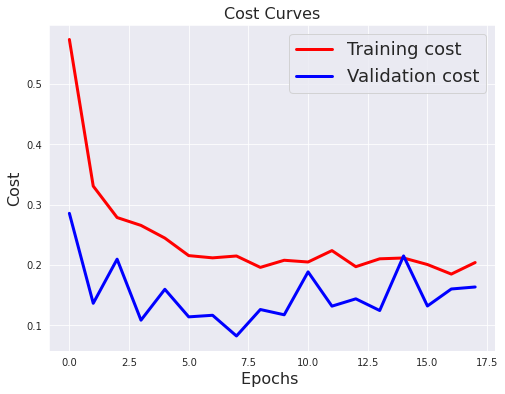

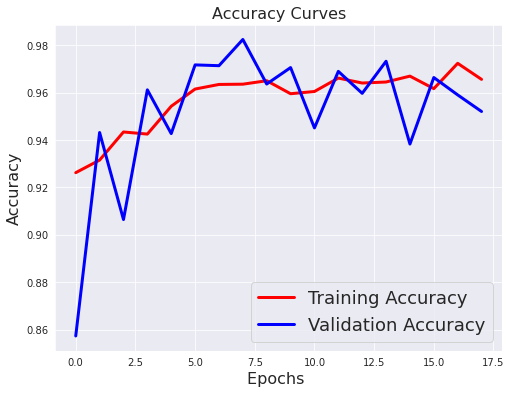

In [74]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [78]:
epochs = [i for i in range(18)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [79]:
pred = modelv2.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [80]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.35      0.88      0.50       408
    Not Fake       1.00      0.95      0.97     14586

    accuracy                           0.95     14994
   macro avg       0.67      0.92      0.74     14994
weighted avg       0.98      0.95      0.96     14994



In [81]:
cm = confusion_matrix(y_test,pred)
cm

array([[  359,    49],
       [  670, 13916]])

In [82]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

In [83]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(69.0, 0.5, 'Actual')

(With 3 Filters) Cnn+Pooling+Dropout+Cnn+Pool+Dropout+2BiLstm

In [84]:
modelv3 = Sequential()
modelv3.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv3.add(Conv1D(filters = 4,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv3.add( MaxPooling1D(pool_size=5))
modelv3.add(Dropout(rate=CDROP_RATE))
modelv3.add(Conv1D(filters = 8,kernel_regularizer=l2(CREG), 
              kernel_size=(5), 
              padding= "valid", 
              strides=1,activation='relu'))
modelv3.add( MaxPooling1D(pool_size=5))
modelv3.add(Dropout(rate=CDROP_RATE))
modelv3.add(Bidirectional(LSTM(units=64 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25)))
modelv3.add(Bidirectional(LSTM(units=32 , recurrent_dropout = 0.1 , dropout = 0.25)))
modelv3.add(Dense(units = 32 , activation = 'relu'))
modelv3.add(Dense(1, activation='sigmoid'))
modelv3.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
modelv3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 300, 4)            3604      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 60, 4)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 4)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 56, 8)             168       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 11, 8)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 8)            

In [86]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [87]:
history = modelv3.fit(x_train, y_train,
                      class_weight = class_weight,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/20
137/137 [==============================] - 81s 524ms/step - loss: 0.5844 - accuracy: 0.9207 - val_loss: 0.2117 - val_accuracy: 0.8997
Epoch 2/20
137/137 [==============================] - 70s 514ms/step - loss: 0.4281 - accuracy: 0.9161 - val_loss: 0.2228 - val_accuracy: 0.8963
Epoch 3/20
137/137 [==============================] - 71s 516ms/step - loss: 0.3783 - accuracy: 0.9290 - val_loss: 0.1982 - val_accuracy: 0.9157
Epoch 4/20
137/137 [==============================] - 71s 515ms/step - loss: 0.3380 - accuracy: 0.9335 - val_loss: 0.1609 - val_accuracy: 0.9310
Epoch 5/20
137/137 [==============================] - 71s 516ms/step - loss: 0.3333 - accuracy: 0.9337 - val_loss: 0.1612 - val_accuracy: 0.9369
Epoch 6/20
137/137 [==============================] - 71s 516ms/step - loss: 0.2974 - accuracy: 0.9424 - val_loss: 0.1321 - val_accuracy: 0.9440
Epoch 7/20
137/137 [==============================] - 70s 514ms/step - loss: 0.2865 - accuracy: 0.9434 - val_loss: 0.1457 - val_ac

Text(0.5, 1.0, 'Accuracy Curves')

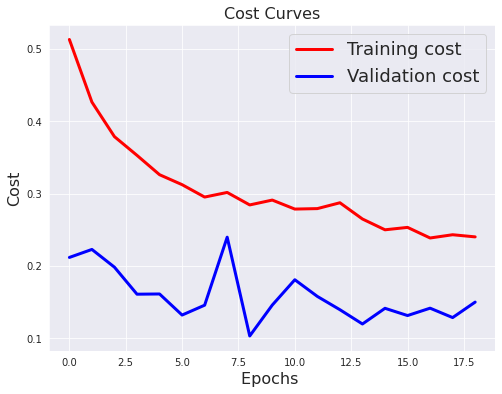

In [94]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [88]:
print("Accuracy of the model on Training Data is - " , modelv3.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv3.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 22s 20ms/step - loss: 0.1170 - accuracy: 0.9572
Accuracy of the model on Training Data is -  95.71506381034851 %
469/469 [==============================] - 9s 20ms/step - loss: 0.1500 - accuracy: 0.9416
Accuracy of the model on Testing Data is -  94.15766596794128 %


In [89]:
pred = modelv3.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [90]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.28      0.76      0.41       408
    Not Fake       0.99      0.95      0.97     14586

    accuracy                           0.94     14994
   macro avg       0.64      0.85      0.69     14994
weighted avg       0.97      0.94      0.95     14994



In [91]:
cm = confusion_matrix(y_test,pred)
cm

array([[  310,    98],
       [  778, 13808]])

In [92]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(69.0, 0.5, 'Actual')

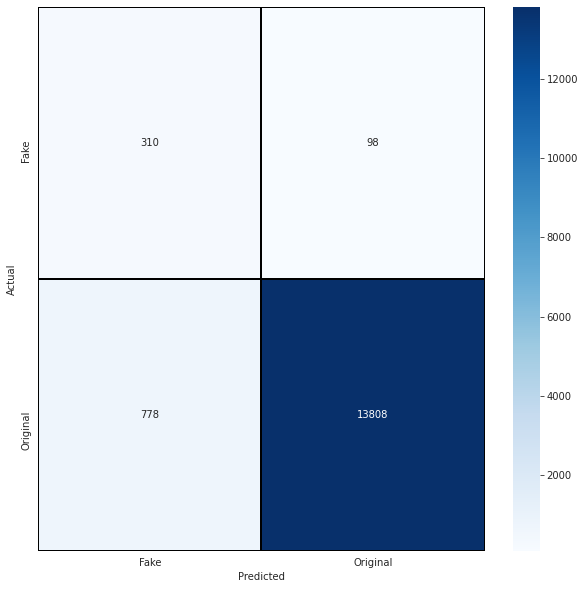

In [93]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

CNN+ LSTM

In [ ]:
class_weight = {0: 12,
                1: 1}

In [95]:
modelv4 = Sequential()
modelv4.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
modelv4.add(Conv1D(filters = 32,kernel_regularizer=l2(CREG), 
              kernel_size=(3), 
              padding= "same", 
              strides=1,activation='relu'))
modelv4.add( MaxPooling1D(pool_size=5))
modelv4.add(Dropout(rate=CDROP_RATE))
modelv4.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
modelv4.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.25))
modelv4.add(Dense(units = 32 , activation = 'relu'))
modelv4.add(Dense(1, activation='sigmoid'))
modelv4.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint(filepath = 'best_model.h5', monitor= 'val_loss', save_best_only = True)]

In [97]:
history = modelv4.fit(x_train, y_train,
                      class_weight = class_weight,
          validation_data = (X_test, y_test),
          epochs = EPOCH,
          verbose = 1,
          callbacks = callbacks,
          batch_size = BATCH_SIZE)

Epoch 1/20
137/137 [==============================] - 174s 1s/step - loss: 0.7411 - accuracy: 0.9353 - val_loss: 0.3266 - val_accuracy: 0.9728
Epoch 2/20
137/137 [==============================] - 168s 1s/step - loss: 0.5231 - accuracy: 0.9288 - val_loss: 0.2096 - val_accuracy: 0.9172
Epoch 3/20
137/137 [==============================] - 169s 1s/step - loss: 0.3201 - accuracy: 0.9367 - val_loss: 0.2241 - val_accuracy: 0.8857
Epoch 4/20
137/137 [==============================] - 169s 1s/step - loss: 0.2865 - accuracy: 0.9372 - val_loss: 0.1105 - val_accuracy: 0.9616
Epoch 5/20
137/137 [==============================] - 168s 1s/step - loss: 0.2256 - accuracy: 0.9581 - val_loss: 0.0901 - val_accuracy: 0.9761
Epoch 6/20
137/137 [==============================] - 168s 1s/step - loss: 0.2218 - accuracy: 0.9606 - val_loss: 0.1210 - val_accuracy: 0.9611
Epoch 7/20
137/137 [==============================] - 169s 1s/step - loss: 0.2023 - accuracy: 0.9610 - val_loss: 0.1175 - val_accuracy: 0.9640

In [98]:
print("Accuracy of the model on Training Data is - " , modelv4.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , modelv4.evaluate(X_test,y_test)[1]*100 , "%")

1094/1094 [==============================] - 45s 41ms/step - loss: 0.0929 - accuracy: 0.9875
Accuracy of the model on Training Data is -  98.75367879867554 %
469/469 [==============================] - 19s 41ms/step - loss: 0.1249 - accuracy: 0.9759
Accuracy of the model on Testing Data is -  97.59237170219421 %


In [99]:
pred = modelv4.predict_classes(X_test)
pred[:5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [100]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.54      0.74      0.63       408
    Not Fake       0.99      0.98      0.99     14586

    accuracy                           0.98     14994
   macro avg       0.77      0.86      0.81     14994
weighted avg       0.98      0.98      0.98     14994



In [101]:
cm = confusion_matrix(y_test,pred)
cm

array([[  301,   107],
       [  254, 14332]])

In [102]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

In [103]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(69.0, 0.5, 'Actual')

In [104]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training cost', 'Validation cost'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.title('Cost Curves',fontsize=16)
 
#Plot accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

In [105]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()